In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor

In [4]:
dataset_path = r"D:\Year 2 Sem 1\depression_dataset_cleaned.csv" 
df = pd.read_csv(dataset_path) 
print("Original Shape:", df.shape)
print(df.head())

Original Shape: (27901, 18)
     id  Gender   Age           City Profession  Academic Pressure  \
0   2.0    Male  33.0  Visakhapatnam    Student                5.0   
1   8.0  Female  24.0      Bangalore    Student                2.0   
2  26.0    Male  31.0       Srinagar    Student                3.0   
3  30.0  Female  28.0       Varanasi    Student                3.0   
4  32.0  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours  

In [7]:
df = df.dropna() 
print("After dropping missing values:", df.shape)

After dropping missing values: (27901, 18)


In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns 
df_numeric = df[num_cols]

In [11]:
iso = IsolationForest(contamination=0.05, random_state=42) 
iso_preds = iso.fit_predict(df_numeric) 
iso_outliers = iso_preds == -1

In [12]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05) 
lof_preds = lof.fit_predict(df_numeric) 
lof_outliers = lof_preds == -1

In [14]:
combined_outliers = iso_outliers | lof_outliers
print("Number of outliers detected:", combined_outliers.sum())

Number of outliers detected: 2723


In [15]:
df_cleaned = df[~combined_outliers] 
print("After removing outliers:", df_cleaned.shape)

After removing outliers: (25178, 18)


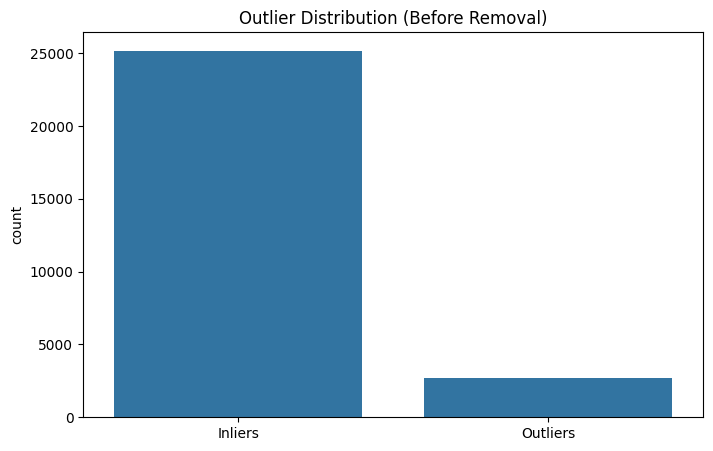

In [16]:
plt.figure(figsize=(8,5)) 
sns.countplot(x=combined_outliers) 
plt.title("Outlier Distribution (Before Removal)") 
plt.xticks([0,1], ["Inliers", "Outliers"]) 
plt.show()

In [18]:
output_path = r"D:\Year 2 Sem 1\depression_dataset_afteroutliers.csv" 
df_cleaned.to_csv(output_path, index=False) 
print(f"\nFinal cleaned dataset saved at: {output_path}")


Final cleaned dataset saved at: D:\Year 2 Sem 1\depression_dataset_afteroutliers.csv
